In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Loading data using keras method

Split is 80/20 
80 percent training
20 percent validating

In [2]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    './model_data/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(200,200),
    batch_size=250
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    './model_data/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(200,200),
    batch_size=250
)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


# Get class names

Should be two: wet and dry

In [3]:
categories = training_dataset.class_names

# Pre-process data

Normalizing rgb values by adding a rescaling layer

In [4]:
norm_layer = layers.Rescaling(1./255)

# Optimize performance

Pre-fetching for fast training and validation

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Build CNN Model

2 2D Convolutional NN 

2 2D MaxPooling NN

2 classes

In [6]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [7]:
fitting = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
32/32 [==============================] - 67s 2s/step - loss: 0.6439 - accuracy: 0.6162 - val_loss: 0.5519 - val_accuracy: 0.7265
Epoch 2/10
32/32 [==============================] - 74s 2s/step - loss: 0.4627 - accuracy: 0.7814 - val_loss: 0.4001 - val_accuracy: 0.8280
Epoch 3/10
32/32 [==============================] - 78s 2s/step - loss: 0.3684 - accuracy: 0.8378 - val_loss: 0.3306 - val_accuracy: 0.8665
Epoch 4/10
32/32 [==============================] - 81s 3s/step - loss: 0.2724 - accuracy: 0.8874 - val_loss: 0.2212 - val_accuracy: 0.9205
Epoch 5/10
32/32 [==============================] - 82s 3s/step - loss: 0.2065 - accuracy: 0.9206 - val_loss: 0.1987 - val_accuracy: 0.9255
Epoch 6/10
32/32 [==============================] - 82s 3s/step - loss: 0.1923 - accuracy: 0.9266 - val_loss: 0.2125 - val_accuracy: 0.9190
Epoch 7/10
32/32 [==============================] - 82s 3s/step - loss: 0.1260 - accuracy: 0.9545 - val_loss: 0.1257 - val_accuracy: 0.9590
Epoch 8/10
32/32 [==

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9

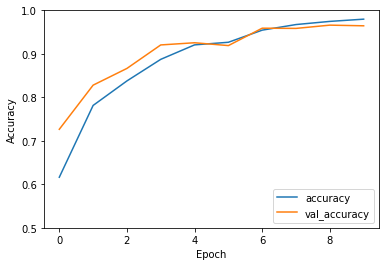

In [9]:
plt.plot(fitting.history['accuracy'], label='accuracy')
plt.plot(fitting.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

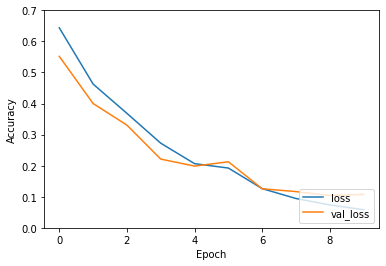

In [10]:
plt.plot(fitting.history['loss'], label='loss')
plt.plot(fitting.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.7])
plt.legend(loc='lower right')

In [11]:
model.save('./models/version3/')

INFO:tensorflow:Assets written to: ./models/version3.1/assets


INFO:tensorflow:Assets written to: ./models/version3.1/assets
